In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

# Initial Set-Up 

In [200]:
amazon = pd.read_csv(r'Datasets\TSA-Fundamentals-Datasets\AMZN.csv', index_col='Date', parse_dates=True)
MSFT = pd.read_csv(r'Datasets\TSA-Fundamentals-Datasets\MSFT.csv')
HRB = pd.read_csv(r'Datasets\TSA-Fundamentals-Datasets\HRB.csv')
DJI = pd.read_csv(r'Datasets\TSA-Fundamentals-Datasets\DJI.csv')

In [ ]:

#Can also use the following to convert the 'Date' column to datetime format  
MSFT['Date'] = pd.to_datetime(MSFT['Date'], format = '%m/%d/%Y')
#Need to set index
MSFT.set_index('Date', inplace=True)


In [196]:
#Check for missing values using .info()
MSFT.info()
#Can resample data to desired frequency => 'w' for weekly
MSFT_Weekly = MSFT.resample('w').mean()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-08-06 to 2017-08-04
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  1258 non-null   float64
dtypes: float64(1)
memory usage: 19.7 KB


C:\Users\Phillip\AppData\Local\Temp\ipykernel_26856\1597523358.py:4: FutureWarning: 'w' is deprecated and will be removed in a future version, please use 'W' instead.
  MSFT_Weekly = MSFT.resample('w').mean()


## DateTime Refresher

In [ ]:
import datetime as dt

#Create date object (specific date with no time)
date = dt.date(2022, 3, 9)
#Create datetime object 
t = dt.datetime(2022, 3, 9, 12, 0, 0)
#Format into string
str_date = date.strftime('%Y-%m-%d %H:%M:%S')
str_t = t.strftime('%Y-%m-%d %H:%M:%S')
#Format string back into datetime object
dt_date = dt.datetime.strptime(str_date,'%Y-%m-%d %H:%M:%S')
dt_t = dt.datetime.strptime(str_t,'%Y-%m-%d %H:%M:%S')

In [123]:
date, t, str_date, str_t, dt_date, dt_t

(datetime.date(2022, 3, 9),
 datetime.datetime(2022, 3, 9, 12, 0),
 '2022-03-09 00:00:00',
 '2022-03-09 12:00:00',
 datetime.datetime(2022, 3, 9, 0, 0),
 datetime.datetime(2022, 3, 9, 12, 0))

In [125]:
import pytz
#Time Zone Handling

#Create a datetime object for specific date and time in UTC 
dt_utc = dt.datetime(2022, 3, 9, 12, 0, 0, tzinfo=pytz.utc)
#Convert UTC time to Eastern Time
eastern_time_zone = pytz.timezone('US/Eastern')
dt_eastern = dt.datetime(2022,3,9,12,0,0, tzinfo=eastern_time_zone)

In [221]:
print(dt_utc, dt_eastern)

2022-03-09 12:00:00+00:00 2022-03-09 12:00:00-04:56


## Shifts and Lags using Datetime

In [ ]:
HRB.set_index('Quarter', inplace=True)
#Format index into periods instead of datetime objects
HRB.index = pd.to_datetime(HRB.index).to_period('Q')

In [251]:
#Can also create a period index e.g., daily periods from 2007 to 2018
day_period_index = pd.period_range(start = '2007-01-01', end='2018-01-01', freq='D')
#Create fake time series data
fake_time_series = pd.Series(data = np.random.randn(len(day_period_index)),
                             index = day_period_index)
#Perform time slice
fake_time_series['2017-01-01':'2018-01-01']

2017-01-01   -0.166253
2017-01-02    0.155792
2017-01-03    0.573506
2017-01-04    1.314119
2017-01-05    1.474832
                ...   
2017-12-28   -1.355893
2017-12-29   -0.285081
2017-12-30   -0.751098
2017-12-31    0.341736
2018-01-01    0.633980
Freq: D, Length: 366, dtype: float64

In [ ]:
#Use .shift() to shift data by a specified number of periods
fake_ts_shifted = fake_time_series.shift(1)
#Calculate lag difference between two time series
lag = fake_time_series - fake_ts_shifted
pd.concat([fake_time_series, fake_ts_shifted, lag], axis=1).head()


,0,1,2
2007-01-01,0.744792,NaN,NaN
2007-01-02,0.794464,0.744792,0.049672
2007-01-03,0.556613,0.794464,-0.237852
2007-01-04,0.892766,0.556613,0.336154
2007-01-05,-0.241412,0.892766,-1.134178


In [262]:
#Date_range() : generates fixed frequency DatetimeIndex (good for indexing)
date_range = pd.date_range(start='2022-01-01', periods=10, freq='D')
date_range

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

# Initial Visualisations

Matplotlib Plotting is lower level than Pandas which does more work under the hood
    - e.g., plt.fillbetween() cannot plot df['Date'] as it is a datetime object
    - must convert to numeric values first


In [76]:
df = pd.read_csv(r'C:\Users\Phillip\Desktop\Python\Datasets\AirPassengers.csv')
df.columns = ['Date', 'Number of Passengers']
df['Date'] = pd.to_datetime(df['Date'])

(-800.0, 800.0)

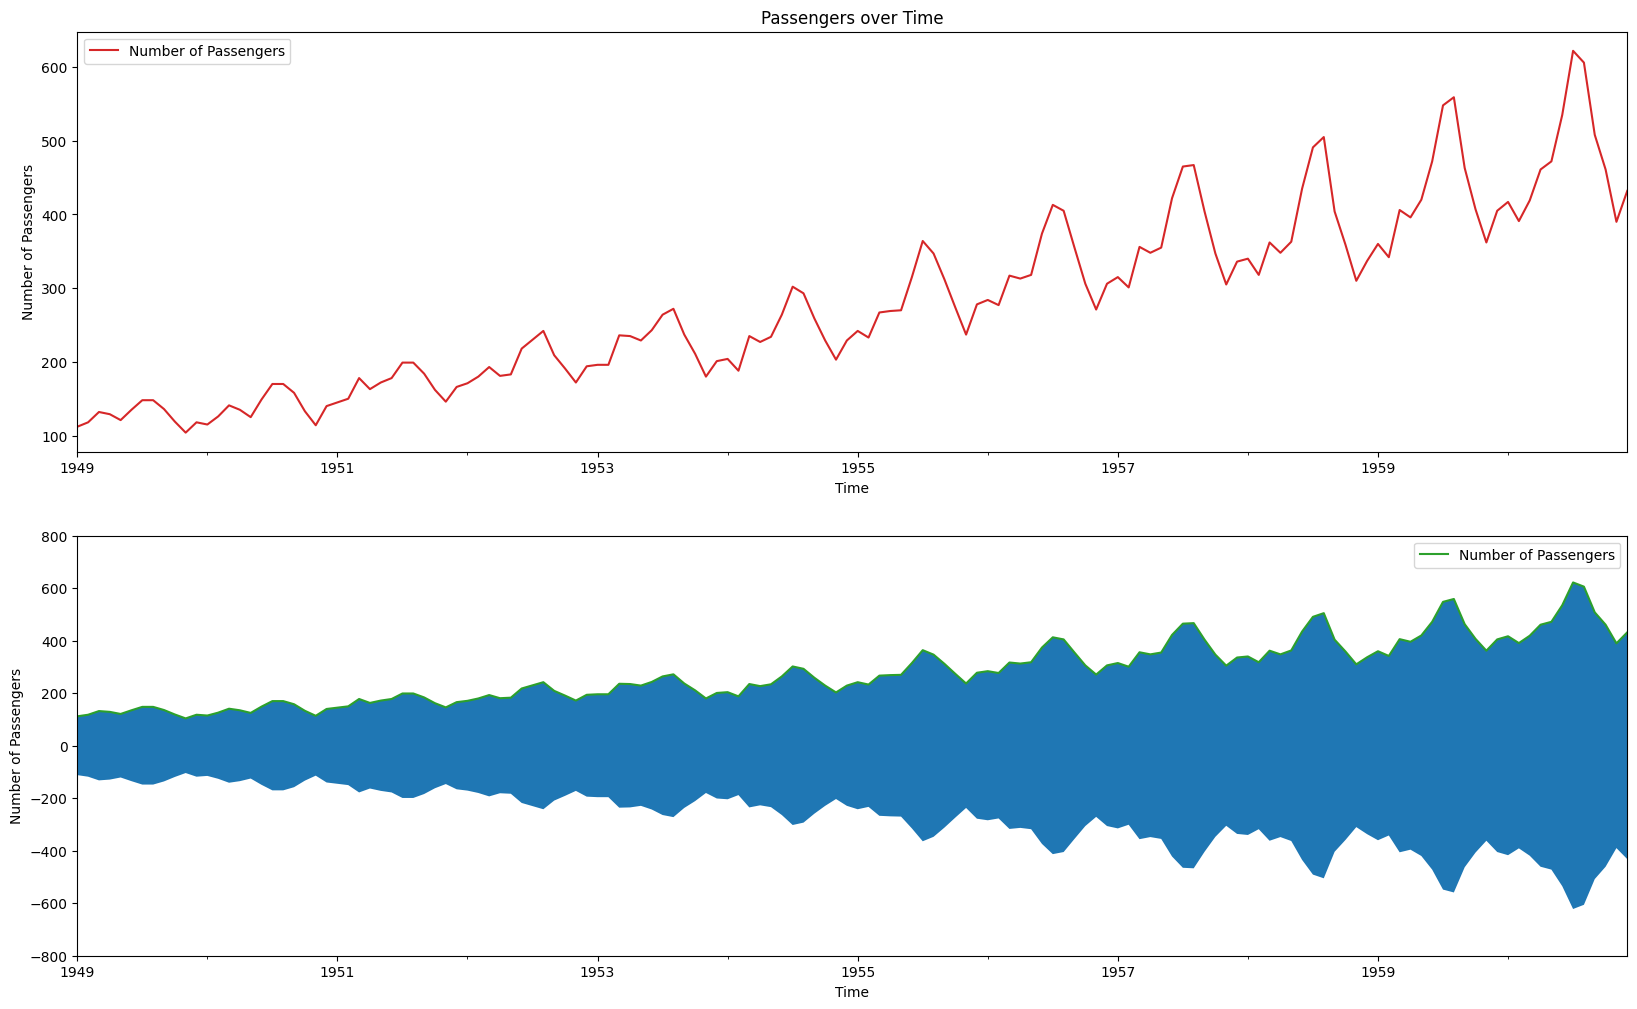

In [88]:
''' 

To plot using Pandas but still be able to manipulate the fig using matplot:
    Create fig, ax object using plt.subplots, then assign the Pandas plot
    to that ax object by setting ax = ax 

To make changes for a specific subplot, e.g., to set ylim for 2nd plot
    ax2.set_ylim()

To plot reflection use plt.fill_between()
    plt.fill_between(x = x data,y1 = first function, y2 = 2nd function)
    Other arguments include:
        - alpha 
        - linewidth
        - color
'''

fig, axs = plt.subplots(figsize=(20,12), nrows=2, ncols = 1)
ax1, ax2 = axs.ravel()
#Making Sure
#Normal Plot
df.plot.line('Date','Number of Passengers',
             color='tab:red',
             title='Passengers over Time', xlabel='Time',
             ylabel='Number of Passengers', ax = ax1)
#Double Y-axis Plot 
df.plot.line('Date', 'Number of Passengers', ax = ax2,
             color='tab:green', xlabel ='Time',
             ylabel = 'Number of Passengers')

#Convert data into numeric values
x = df['Date'].values
plt.fill_between(x = x, y1 = df['Number of Passengers'],
                 y2 = -df['Number of Passengers'])

ax2.set_ylim(-800, 800)

# Decomposing a Time Series

Time Series visualisation can show 5 components
    1. Base level
    2. Trends
    3. Seasonality (trends that repeat with respect to something)
    4. Cyclicality (trends with no set frequency)
    5. Error

These effects can be combined (when modelling) either multiplicatively or additively e.g., 

**Additive time series:**

Value = Base Level + Trend + Seasonality + Error


**Multiplicative Time Series:**

Value = Base Level x Trend x Seasonality x Error

We can choose via statsmodel how to decompose these effects 

In [66]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import statsmodels.api as sm

In [157]:
#Multiplicative Decomposition
multiplicative_decomposition = seasonal_decompose(df['Number of Passengers'],
                                                  model = 'multiplicative',
                                                  period = 30)
#Additive 
additive_decomposition = seasonal_decompose(df['Number of Passengers'],
                                            model = 'additive',
                                            period = 30)

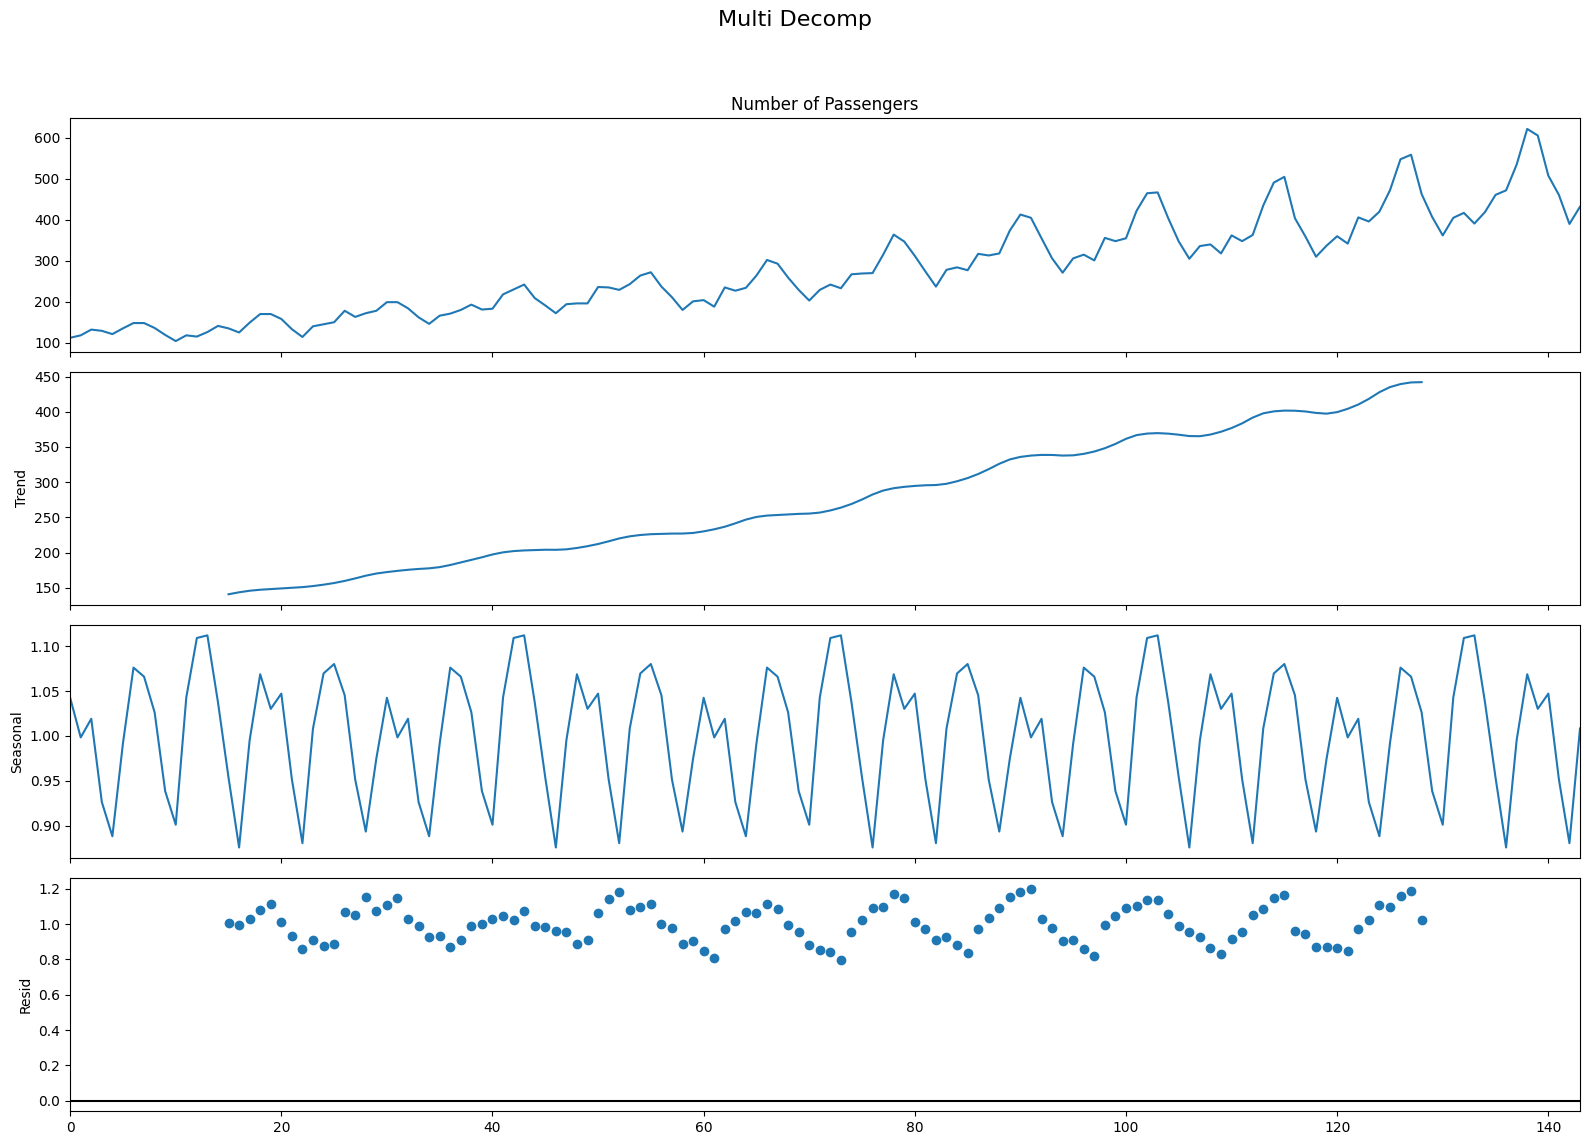

In [158]:
'''
RC Params 
    - plt.rcParams behave like dictionary
    - Common keys are 
        1. figure.figsize
        2. axes.labelsize
        3. lines.linesize
    - to update RCparams use plt.rcParams.update( {dictionary} )

Tight_layout(pad, h_pad, w_pad, rect)
    - Automatically adjusts parameters to ensure axes labels, titles, etc fit all subplots
    - pad : padding between figure edge and subplot edge 
    - h_pad, w_pad : padding between edges of subplots
    - rect : rectangle in normalised figure coordinaties (0 to 1) where subplot will fit
        - rect = (left, bottom, right, top)
 '''
plt.rcParams.update({'figure.figsize' : (16,12)})
multiplicative_decomposition.plot().suptitle('Multi Decomp', fontsize = 16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])


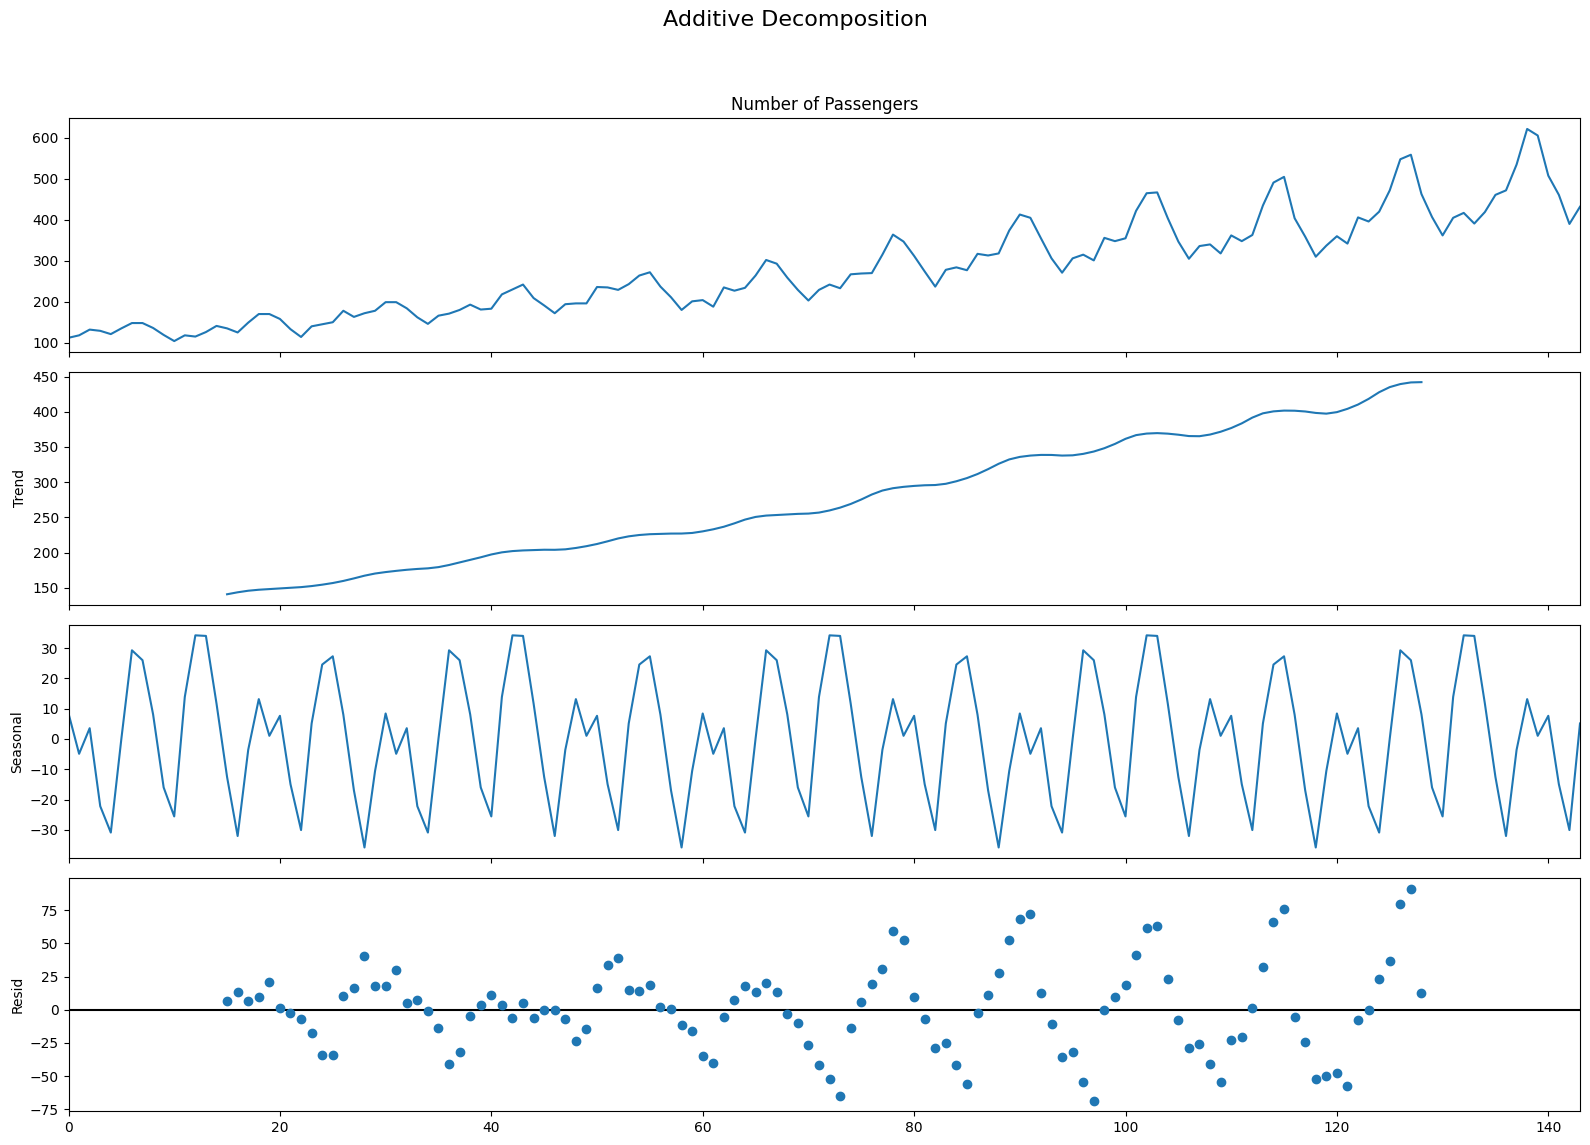

In [159]:
#Additive
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Statsmodel's seasonal decompose breaks down time series well for us. We see residuals for additive has a pattern which is not good whereas multiplicative's residuals are seemingly quite random

# Transformations to make Time series stationary

Transformations to do this include
1. Differencing 
2. Taking Logs or Nth roots
3. Combination 


## Stationarity vs Non-Stationarity in Processes

Must make sure we use stationary data (unless cointegration)

Text(0.5, 1.0, 'Non-Stationary Trend')

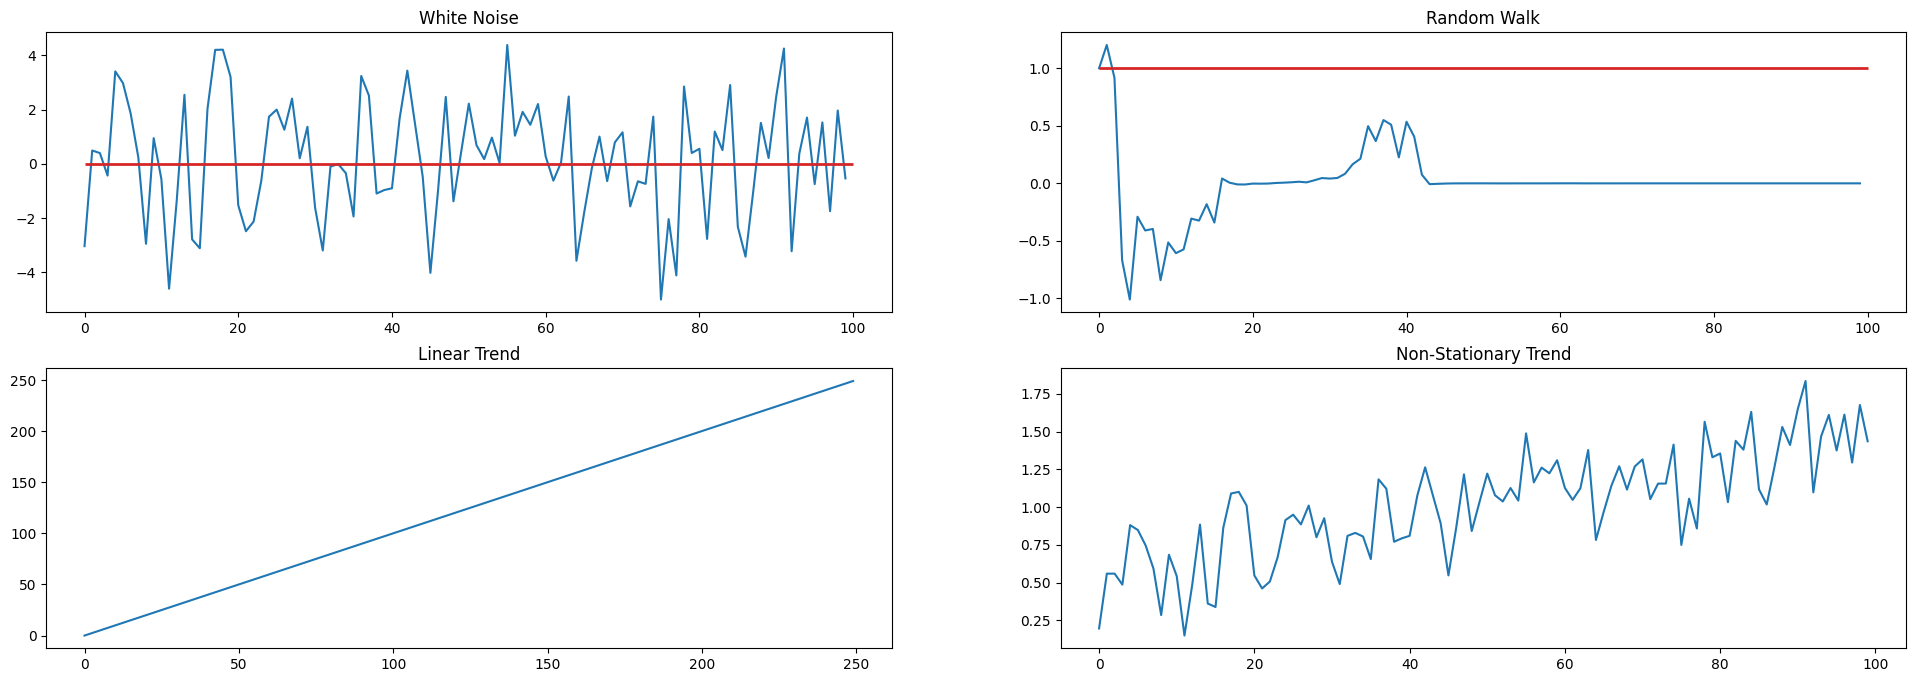

In [253]:
''' Creating Synthetic Data to show diffrence between stationary, trends, and other process'''

#Create Plots
fig, axs = plt.subplots(2,2, figsize=(24,8), dpi = 100)
ax1, ax2, ax3, ax4 = axs.ravel()

#Stationary Data (White Noise)
stationary_process = np.random.normal(0, 2, 100)
ax1.plot(np.arange(0, 100), stationary_process)
ax1.set_title(label = 'White Noise')
ax1.hlines(y=0, xmin = 0, xmax= 100, color = 'tab:red', linewidth=2)

#Random Walk (Non-Stationary)
drift = .1  
volatility = 0.1  
n = 100            
r_walk = np.random.normal(loc=(1 + drift)**(1/n), 
                          scale=volatility * np.sqrt(n), 
                          size=n)
r_walk[0] = 1
random_walk = r_walk.cumprod()
ax2.plot(np.arange(100), random_walk)
ax2.hlines(y=1, xmin = 0, xmax= n, color = 'tab:red', linewidth=2)
ax2.set_title(label = 'Random Walk')

#Trend (Linear)
ax3.plot(np.arange(0,250), np.arange(0,250))
ax3.set_title(label = 'Linear Trend')

#Non-Stationary Trend 
trend_coeff = 0.1
constant = 0.5
non_stationary_trend = constant + 0.01 * np.arange(0,100) + trend_coeff * stationary_process
ax4.plot(np.arange(0,100), non_stationary_trend)
ax4.set_title(label = 'Non-Stationary Trend')

# TSA Number 2

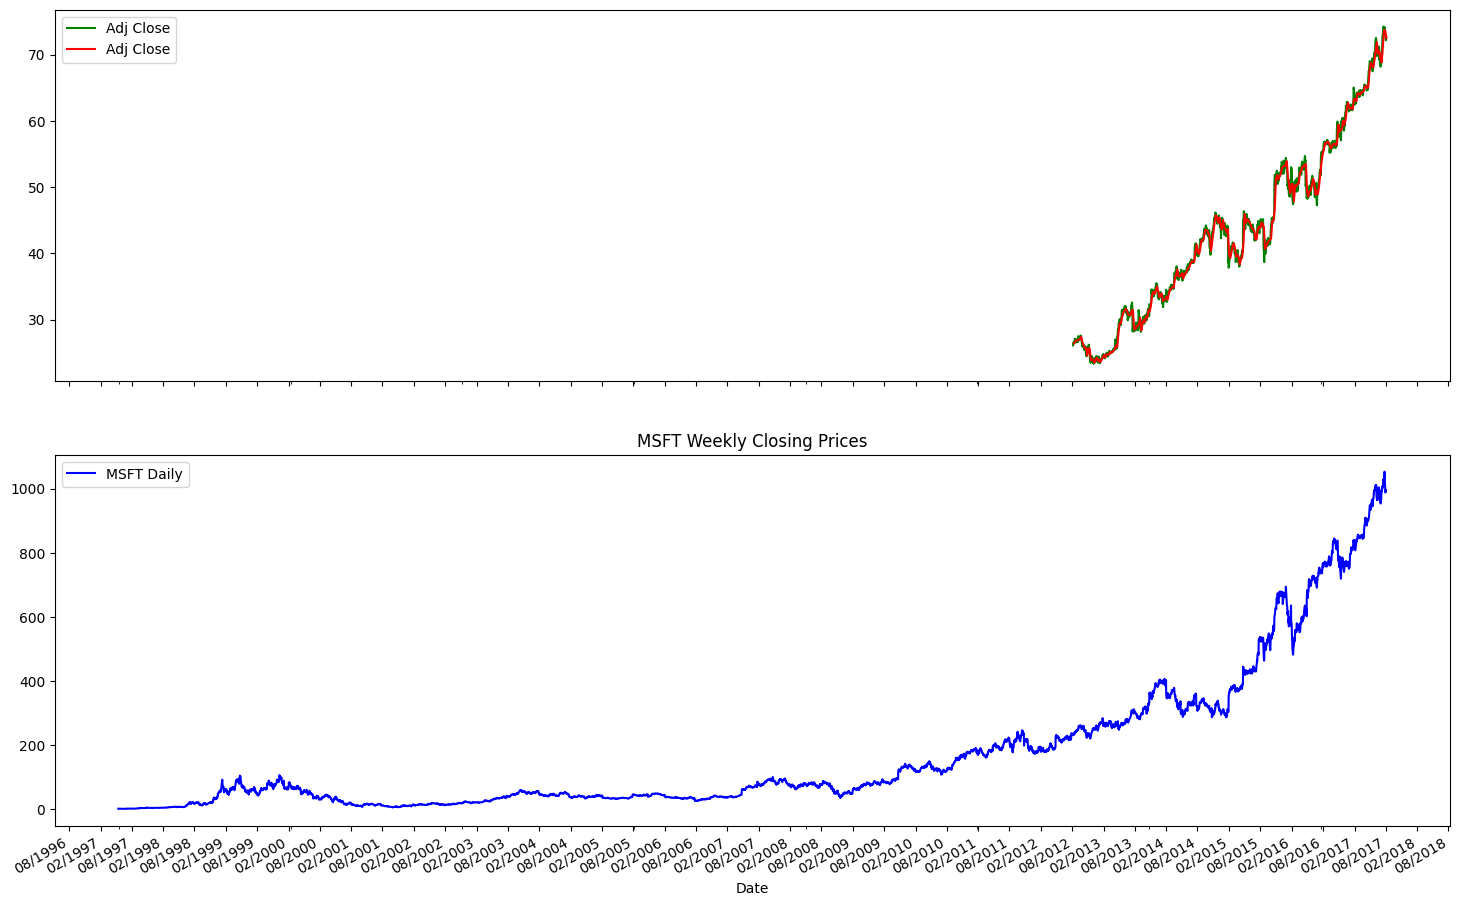

In [197]:
'''
Matplotlib:
    1. sharex, sharey in subplots => aligns the x and y axes of the subplots
    2. use plt.legend() to add a legend to the plot
    3. use plt.title() to add a title to the plot
    4. use plt.xlabel() and plt.ylabel() to add labels to the x and y axes
    5. Format dates on X-axis using ax.xaxis.set_major_locator(mdates.MonthLocator())
       and ax.xaxis.set_major_formatter(mdates.DateFormatter())
'''
import matplotlib.dates as mdates

fig, axs = plt.subplots(2, figsize=(18,12), sharex=True, sharey=False)
ax1, ax2 = axs.ravel()

AMZN.plot(color='blue', ax=ax2)
plt.title('AMZN Daily Closing Prices')
#Format X-axis to dates : use interval = 6 to specify every 6 months
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))

MSFT.plot(color='green', ax=ax1)
MSFT_Weekly.plot(color='red', ax=ax1)
plt.title('MSFT Weekly Closing Prices')
plt.legend(['MSFT Daily', 'MSFT Weekly'])

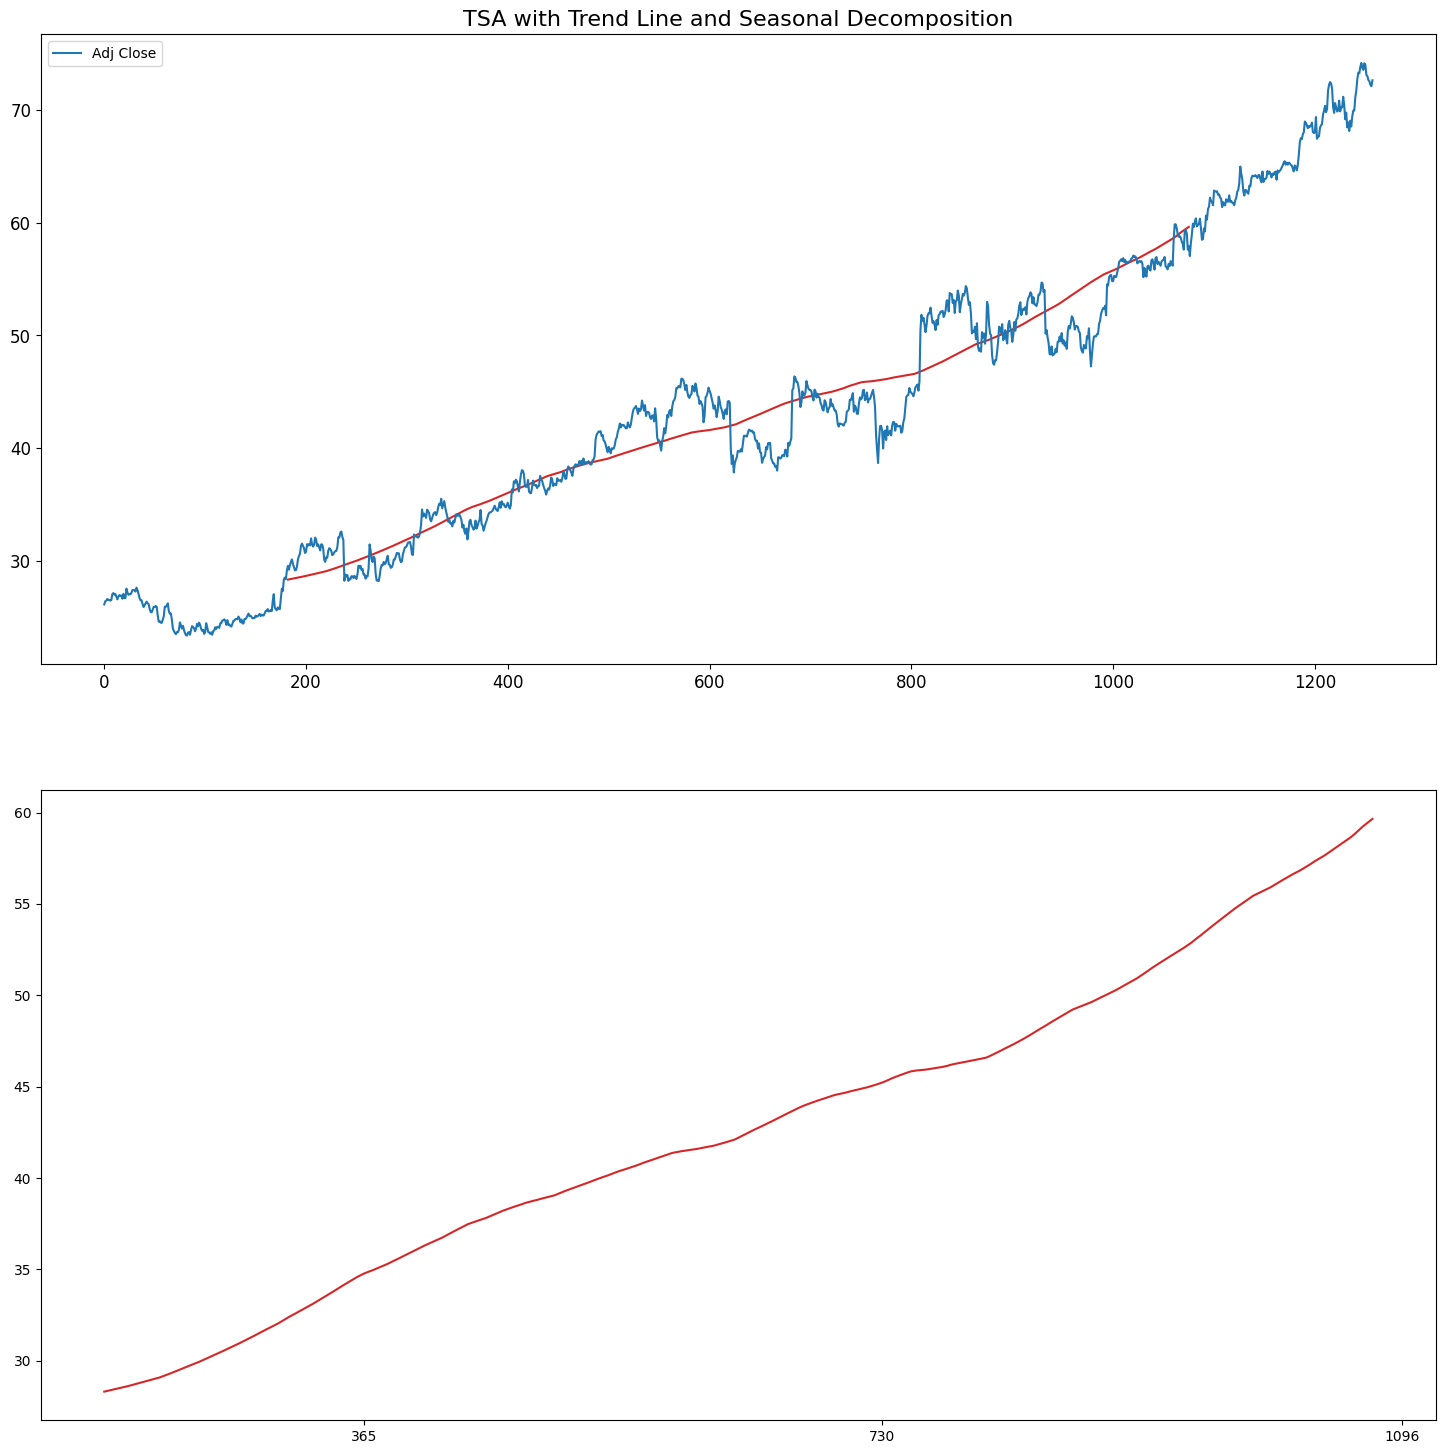

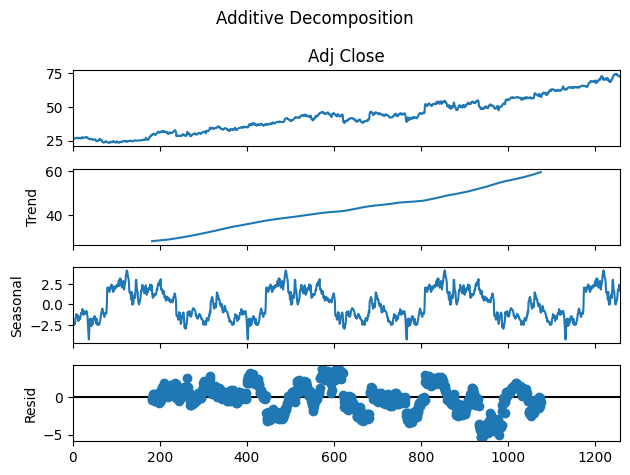

In [192]:
''' 
Can plot the entire seasonal decomposition immediately from seasonal_decompose
    - Can also add trend lines and seasonal decomposition to further visualise trends and seasonal

Trend lines and seasonal decomposition to further visualise trends and seasonal
patterns 
        1. Use sm.tsa.seasonal_decompose function (data, model, period, extrapolate_trend)
        2. Returns an object with the following four attributes:
            - trend
                - and trend.index 
            - seasonal
            - resid
            - observed (original input time series)
        3. Can plot directly from the object
        4. Can also add trend lines using seasonal_decompose

'''
#Can also use matplotlib to plot the trend line
fig, axs = plt.subplots(2, figsize=(18,18))
ax1, ax2 = axs.ravel()

ax1.set_title('TSA with Trend Line and Seasonal Decomposition', fontsize=16)
ax1.plot(Decompose_Result_Object.trend.index, Decompose_Result_Object.trend, label='Trend', color='tab:red')
MSFT.plot(ax=ax1, label='Original', fontsize=12)

#Plot Trend Line
ax2.plot(Decompose_Result_Object.trend.index, Decompose_Result_Object.trend, label='Trend', color='tab:red')
ax2.xaxis.set_major_locator(mdates.YearLocator())
#Add Trend line using seasonal_decompose
Decompose_Result_Object = sm.tsa.seasonal_decompose(MSFT['Adj Close'], model='additive', period=365)
#Can PLot Directly from the object
Decompose_Result_Object.plot().suptitle('Additive Decomposition')
plt.tight_layout()

### Data Pre Processing


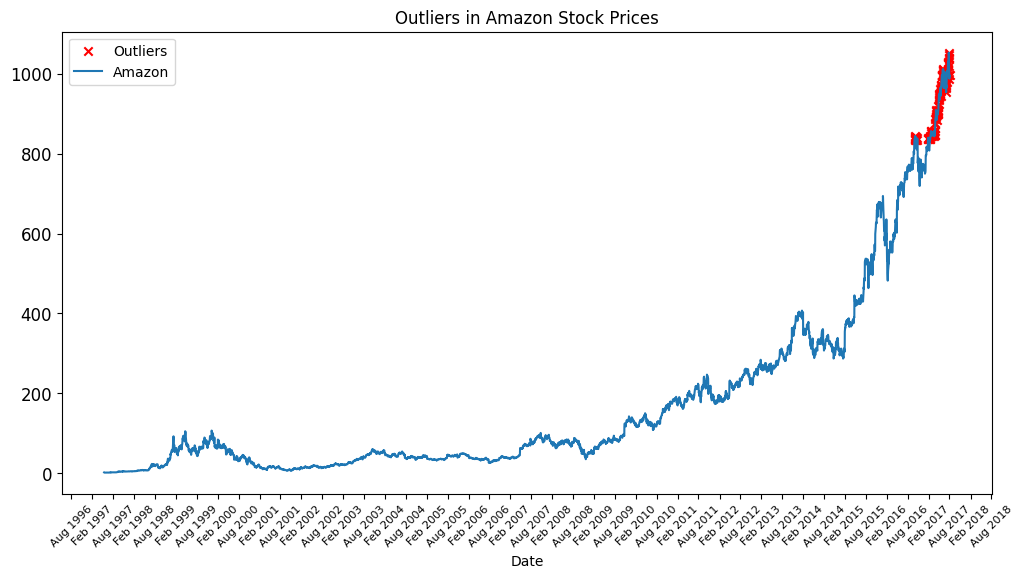

In [201]:
#Outlier detection using Z-Score : Calculate Z-Scores for each data point
z_scores_Amazon = (amazon['Adj Close'] - amazon['Adj Close'].mean()) / amazon['Adj Close'].std()
#Define threshold for outliers (3 standard deviations)
outliers = amazon[z_scores_Amazon.abs() > 3]
#Plot the outliers and can decide to remove
fig, ax = plt.subplots(1, figsize=(12,6))
plt.scatter(outliers.index, outliers['Adj Close'], label='Outliers', marker='x', color='red')
plt.plot(amazon.index, amazon['Adj Close'], label='Amazon')

#Set titles, labels, and legend
plt.title('Outliers in Amazon Stock Prices')
plt.xlabel('Date')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=12)
plt.legend()

## Transforming the Data 
### Differencing, Log Transformations, Box-Cox

### Take prices and turn it into LOG RETURNS


C:\Users\Phillip\AppData\Local\Temp\ipykernel_26856\2225786308.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  amazon_log_monthly_returns = amazon_log_returns.resample('M').mean()


Text(0.5, 1.0, 'Log Returns of Amazon Stock Prices')

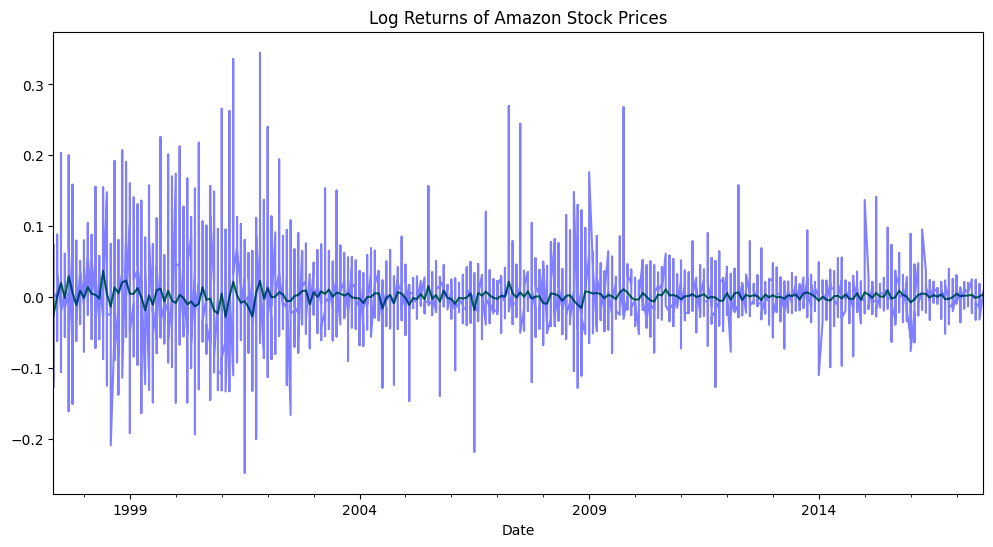

In [220]:
''' Log Transform : reduce skew and variability. Turn prices into returns'''

#Calculate Returns
amazon_returns = amazon['Adj Close'].pct_change()
amazon_log_returns = np.log(1 + amazon_returns)
#Plot Returns
amazon_log_monthly_returns = amazon_log_returns.resample('M').mean()
amazon_log_monthly_returns.plot(figsize=(12,6), label='Monthly Returns', color='green')
amazon_returns.plot(color='blue', title='Daily returns', alpha = 0.5)
plt.title('Log Returns of Amazon Stock Prices')
